In [1]:
# imports

import sqlalchemy
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import pickle
from sklearn import preprocessing


In [2]:
#Exportamos datasets(elegir esta opción )

diamonds_train = pd.read_csv('./data/diamondssql.csv')
diamonds_test = pd.read_csv('./data/diamonds_test.csv')

# Cambio test

In [3]:
##Exportamos dataset from sql
 
diamonds_sql_train = './data/diamonds_train.db'
connection = sql.connect(diamonds_sql_train)

## Obtenemos el dataset con SQL 
query = '''SELECT tr.index_id, c.clarity, cl.color, ct.cut, dm.depth, dm.'table', dm.x, dm.y, dm.z, tr.price, ci.city, tr.carat
FROM diamonds_properties pr
   INNER JOIN diamonds_clarity c ON pr.clarity_id = c.clarity_id 
   INNER JOIN diamonds_color cl on pr.color_id = cl.color_id 
   INNER JOIN diamonds_cut ct on pr.cut_id = ct.cut_id 
   INNER JOIN diamonds_dimensions dm on pr.index_id = dm.index_id
   INNER JOIN diamonds_transactional tr on pr.index_id = tr.index_id
   INNER JOIN diamonds_city ci on tr.city_id = ci.city_id'''
   


In [4]:
#obtenemos el dadaset en pandas con la consulta de la query
diamonds_train_sql = pd.read_sql_query(query,connection)
diamonds_train_sql.head()


diamonds_train_sql.to_csv('./data/diamonds_train_sql.csv')

#Resumen de BD:

- diamonds_train = Csv con la query hecha en SQL e importado 
- diamonds_train_sql = Csv con la query hecha en jupyter
- diamonds_test = Csv que nos da el ejercicio


In [20]:
#EDA diamodns_train

#diamonds_train.set_axis(['color', 'cut', 'clarity', 'price', 'city', 'depth', 'carat', 'table', 'x', 'y', 'z'], axis=1)
#diamonds_train.head()
#diamonds_train.info
# 40455 rows x 11 columns]
#diamonds_train.columns
#diamonds_train.head()
#diamonds_test.head()
diamonds_train.head()


,color,cut,clarity,price,city,depth,carat,table,x,y,z
0,J,Premium,VS2,4268,Dubai,62.4,1.21,58.0,6.83,6.79,4.25
1,H,Very Good,VS2,505,Kimberly,63.0,0.32,57.0,4.35,4.38,2.75
2,G,Fair,VS1,2686,Las Vegas,65.5,0.71,55.0,5.62,5.53,3.65
3,D,Good,SI1,738,Kimberly,63.8,0.41,56.0,4.68,4.72,3.00
4,G,Ideal,SI1,4882,Dubai,60.5,1.02,59.0,6.55,6.51,3.95


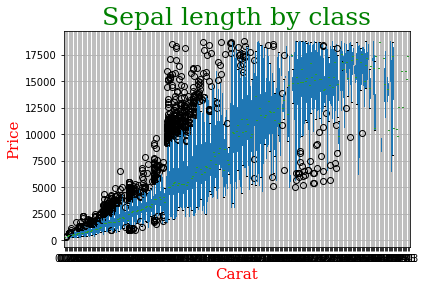

In [21]:
#scatter_plot1 = plt.scatter(x = diamonds_train['carat'], y = diamonds_train['price'])

diamonds_train.boxplot(column='price', by='carat')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Price',fontdict=font2)
plt.xlabel('Carat',fontdict=font2)
plt.suptitle('')
plt.title('Sepal length by class',fontdict=font1)
plt.show()

In [22]:
#Probamos quitando identificando los quiantiles más bajos y altos

'''Así que siguiendo un hilo de stackoverflow, aplico estas fórmulas y lo hago 4 veces en los valores cuantitativos del dataset.'''
q_low = diamonds_train["price"].quantile(0.05)
q_hi  = diamonds_train["price"].quantile(0.96)

In [23]:
#creamos un nuevo dataset diamonds_train_out_carat

diamonds_train = diamonds_train[(diamonds_train["price"] < q_hi) & (diamonds_train["price"] > q_low)]
#diamonds_train.info vs diamonds_train_out_carat.info
# 40455 rows x 11 columns] vs [39615 rows x 11 columns]

In [24]:
#EDA diamodns_test

#diamonds_test.head()
#diamonds_test.info
# [13485 rows x 11 columns]
#diamonds_test.columns


In [25]:
#Definimos la columna target y configuramos las features del dataset: categóricas o numéricas

target = "price"
cat_features = ['cut','color','clarity']
num_features = ['carat','depth','table','x','y','z']



In [26]:
# cambiamos los tipos de para las features categoricas a category en ambos dataset

#for feature in cat_features:
#    diamonds_train[feature] = diamonds_train[feature].astype('category')
#    diamonds_test[feature] = diamonds_test[feature].astype('category')
    
#diamonds_test.head()

In [27]:
# Hacemos getdummies con features numéricas y categóricas para cambiar la disposición de los dtaos para ML en Train

cat_df_train = pd.get_dummies(diamonds_train[cat_features])
num_df_train = diamonds_train.loc[:,num_features]
train_df = pd.concat([cat_df_train,num_df_train],axis=1)

#añadimos un index a train_df

train_df.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.21,62.4,58.0,6.83,6.79,4.25
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.71,65.5,55.0,5.62,5.53,3.65
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0.41,63.8,56.0,4.68,4.72,3.00
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1.02,60.5,59.0,6.55,6.51,3.95
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1.52,61.2,57.0,7.45,7.39,4.54


In [28]:
# Hacemos getdummies con features numéricas y categóricas para cambiar la disposición de los dtaos para ML en Test

cat_df_test = pd.get_dummies(diamonds_test[cat_features])
num_df_test = diamonds_test.loc[:,num_features]
test_df = pd.concat([cat_df_test,num_df_test],axis=1)

#añadimos un index a train_df

test_df.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0.79,62.7,60.0,5.82,5.89,3.67
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1.20,61.0,57.0,6.81,6.89,4.18
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1.57,62.2,61.0,7.38,7.32,4.57
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0.90,63.8,54.0,6.09,6.13,3.90
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0.50,62.9,58.0,5.05,5.09,3.19


In [29]:
features = list(cat_df_train.columns) + list(num_df_train.columns)


In [30]:
#Data preparation II - Peevio a aplicar el modelo de ML

scaler = StandardScaler()
x =scaler.fit_transform(train_df.loc[:,features].values)
y = diamonds_train[target]

train_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.21,62.4,58.0,6.83,6.79,4.25
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.71,65.5,55.0,5.62,5.53,3.65
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0.41,63.8,56.0,4.68,4.72,3.00
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1.02,60.5,59.0,6.55,6.51,3.95
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1.52,61.2,57.0,7.45,7.39,4.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40449,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0.71,61.9,56.0,5.69,5.72,3.53
40450,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1.34,62.7,57.0,7.10,7.04,4.43
40451,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,2.02,57.1,60.0,8.31,8.25,4.73
40452,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1.01,62.7,56.0,6.37,6.42,4.01


In [31]:
### Aplicamos un modelo para entrenar 
#Entrenamos el modelo con  Random Forest
#definimos que vamos utilizar:

model1 = RandomForestRegressor()
#model2 = RLinearRegression()

model1.fit(x,y)

RandomForestRegressor()

In [32]:
#submission

x_test= scaler.transform(test_df.loc[:,features].values)
y_hat = model1.predict(x_test).clip(0,3000)
test_df.columns

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'carat',
       'depth', 'table', 'x', 'y', 'z'],
      dtype='object')

In [33]:


#test_df.head()
submission_test = pd.DataFrame({'id': diamonds_test['id'],'price': y_hat})

submission_test.info

<bound method DataFrame.info of           id    price
0          0  3000.00
1          1  3000.00
2          2  3000.00
3          3  3000.00
4          4  1708.23
...      ...      ...
13480  13480  1935.46
13481  13481  2461.23
13482  13482  2864.53
13483  13483  2187.18
13484  13484   839.66

[13485 rows x 2 columns]>

In [34]:
submission_test.to_csv('submission_test_Randomforest4.csv', index =False)